In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = pd.read_csv('X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [3]:
X.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0
2,300000000.0,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0
3,275000000.0,2012.0,2.35,164.0,106759.0,250000000.0,8.5,160887295.0,4404.0
4,275000000.0,2013.0,2.35,150.0,45757.0,215000000.0,6.5,29210849.0,3904.0


# Hay que escoger una metrica de rendimiento

El traint test split particiona los datos y el score de prediccion puede variar en diferentes iteraciones por lo tanto hay que variar

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_tes, y_train, y_test = train_test_split(X,y)

Lo que buscamos es que los analisis sean reproducibles, lo que no pasa con traint testsplit, la particion es distinta, a menos que usemos una semmilla

Agrego dos columnas, una es el ingreso la primera semana y la segundo las cines<br>
Entre mas cines trasmitida la pelicula, mayor información aportaria

In [6]:
X_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
1814,18000000.0,2013.0,2.35,98.0,1353.0,18000000.0,7.3,612064.0,6.0
1034,40000000.0,2015.0,2.35,110.0,12876.0,40000000.0,6.0,2469341.0,2797.0
896,45000000.0,2010.0,2.35,128.0,2507.0,45000000.0,7.2,183009.0,4.0
65,175000000.0,2009.0,2.35,94.0,2579.0,175000000.0,6.5,59321095.0,4104.0
1700,20000000.0,2015.0,2.35,111.0,9941.0,19500000.0,6.2,6652996.0,2392.0


In [7]:
X_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
1814,18000000.0,2013.0,2.35,98.0,1353.0,18000000.0,7.3,612064.0,6.0
1034,40000000.0,2015.0,2.35,110.0,12876.0,40000000.0,6.0,2469341.0,2797.0
896,45000000.0,2010.0,2.35,128.0,2507.0,45000000.0,7.2,183009.0,4.0
65,175000000.0,2009.0,2.35,94.0,2579.0,175000000.0,6.5,59321095.0,4104.0
1700,20000000.0,2015.0,2.35,111.0,9941.0,19500000.0,6.2,6652996.0,2392.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [9]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y,random_state = 1)

In [10]:
pd.DataFrame.equals(X_train,X2_train)

True

prototipiar rapidamente, calculo final de performance

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [12]:
scores = cross_val_score(Lasso(),X,y,cv=5, scoring='r2')
scores

C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.597525917312256e+16, tolerance: 1537125339230475.5
  positive)
C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.2948609445355336e+18, tolerance: 8334877530886792.0
  positive)
C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.43073153606289e+18, tolerance: 8543073557124827.0
  positive)
C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476:

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [13]:
scores.mean()

0.44964021745791777

In [14]:
Lasso().fit(X_train, y_train).score(X_test,y_test)

C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.99644619806081e+17, tolerance: 7479170615554818.0
  positive)


0.7926190294963362

El sesgo alto esta relacionado al undefiting  y una varianza alta esta ligada al overfiting

In [15]:
#!pip install --upgrade scikit-learn

tiempos de entrenamiento, prediccion, cuanto se demora en dar una prediccion, nos da el score de entrenamiento y de test

In [16]:
from sklearn.model_selection import cross_validate
result = cross_validate(Lasso(),X,y,return_train_score = True, cv = 5)
result

C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.597525917312256e+16, tolerance: 1537125339230475.5
  positive)
C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.2948609445355336e+18, tolerance: 8334877530886792.0
  positive)
C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.43073153606289e+18, tolerance: 8543073557124827.0
  positive)
C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476:

{'fit_time': array([0.18698931, 0.23198605, 0.03199458, 0.19098711, 0.19898987]),
 'score_time': array([0.00999689, 0.00700283, 0.00599742, 0.00800467, 0.00499845]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

###### Hay una gran diferencia entre los scores, eso quiere decir que hay una varianza alta

In [17]:
test_scores = result['test_score']
train_scores = result['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039036
0.44964021745791777


Tenemos bias por lo que buscamos modelos mas complejos

KNN

In [18]:
from sklearn.neighbors  import KNeighborsRegressor

In [19]:
cross_validate(KNeighborsRegressor(), X, y, cv=5)

{'fit_time': array([0.06751966, 0.01999354, 0.03399539, 0.04599833, 0.03099585]),
 'score_time': array([0.03100371, 0.2065134 , 0.20099092, 0.13698936, 0.13298917]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077])}

In [20]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)

{'fit_time': array([0.01562095, 0.01600313, 0.0156219 , 0.01023126, 0.02028894]),
 'score_time': array([0.01958823, 0.0294342 , 0.02532411, 0.01217127, 0.0080595 ]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ])}

# Curva de validation

In [21]:
from sklearn.model_selection import validation_curve

In [23]:
#Cantidad de vecinos
n = np.arange(2,50,2)
#Entrenando 24 modelos

In [26]:
train_scores, test_scores = validation_curve(KNeighborsRegressor(),X,y,param_name='n_neighbors', param_range=n,cv=5)

In [28]:
np.mean(train_scores, axis = 1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

El alfa le dara mas libertad al modelo, si el valor es alto mas simplifica el modelo y si el valor es bajo complejisa  el modelo

In [32]:
Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

([<matplotlib.axis.XTick at 0x2319bb62e10>,
 <a list of 24 Text xticklabel objects>)

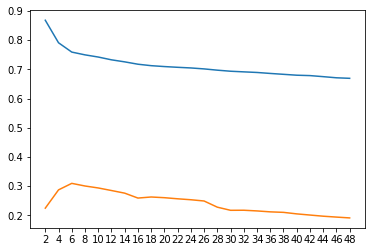

In [34]:
plt.plot(np.mean(train_scores, axis = 1))
plt.plot(np.mean(test_scores, axis = 1))
plt.xticks(np.arange(24),n)

El mejor parametros vecinos es 6

# Curva de aprendizaje

In [36]:
from sklearn.model_selection import learning_curve

- cantidad con la que se entreno el modelo 177,  577,  976, 1376, 1776
- 

In [40]:
cl =  learning_curve(KNeighborsRegressor(n_neighbors=6), X,y,cv = 5)
samples, train, test = cl[0], cl[1], cl[2]

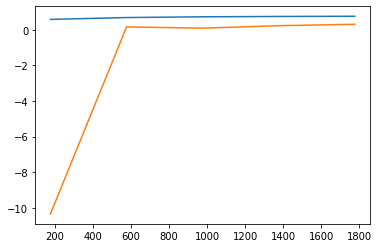

In [41]:
plt.plot(samples, np.mean(train,axis=1))
plt.plot(samples, np.mean(test,axis=1))

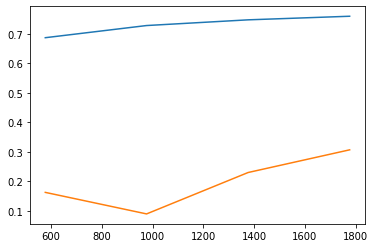

In [42]:
plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

Si la curva no es una asintota, significa que el modelo puede seguir aprendiendo, si el modelo es una asintota significa que el modelo no aprendera mas

Varianza alta :<br>

- Conseguir más ejemplos.
- Reducir cantidad de features.
- Aumentar coeficiente de regularización(alpha<)

Bias Alto :<br>
- Más features.
- Modelo más complejo.
Mal resultado general :<br>
probar otro algoritmo / familia de modelos, quizás las hipótesis del modelo no son cumplidas por el dataset.

El K_Learn es muy bueno para ML pero tiene la maldición de la sobredimencionalidad y en este caso consume muchos datos, por lo tanto no es aplicable en todos los casos.